<h1>Gerar pastas com imagens utilizando o deepFace<h1>




<h3> 1.1 - Criar Função 

In [5]:

import os
import cv2
from deepface import DeepFace

def generateFolderWithFaces(output_folder, video_path, target_image_path):
                #(Pasta onde vai ser salvo, caminho de video, Imagem de referência)

    max_saved_faces=15  # Maximo de imagens a serem salvas
    step_frame=20  # Frames a serem pulados
    detected_faces_list = []  # Lista para armazenar as faces detectadas
    detected_faces_counter = 0  # Contador de faces detectadas
    frame_counter = 0  # Contador de frames

    # Carregue a imagem alvo
    target_image = cv2.imread(target_image_path)

    # Carregue o vídeo
    cap = cv2.VideoCapture(video_path)

    # Enquanto o Video estiver aberto:
    while cap.isOpened():

        # Contabiliza frames
        frame_counter += 1

        # Pega o próximo frame
        ret, frame = cap.read()

        # Se Acabou o vídeo ou detectou o limite de faces: Pare
        if not ret or detected_faces_counter >= max_saved_faces:
            break

        # "Pula" alguns frames
        if frame_counter % step_frame != 0:
            continue

        # Detecte as faces no frame usando DeepFace.verify
        detected_faces = DeepFace.verify(frame, target_image, "VGG-Face", enforce_detection=False)
        
        # Se no dicionario 'verified' for verdadeiro e 'similarity_metric' for "cosine":
        # Ou seja se for verificada uma face e ela for cosena (no caso muito parecida com a imagem de referência):
        if detected_faces ['verified'] == True and detected_faces['similarity_metric'] == "cosine":
            
            # Total de faces detectadas até o momento
            detected_faces_counter += 1

            #Para cada Face detectada:
            for i, face in enumerate(detected_faces):

                # Verifique se a face é igual à imagem alvo
                (x, y, w, h) = (int(detected_faces['facial_areas']['img1']['x']), int(detected_faces['facial_areas']['img1']['y']), int(detected_faces['facial_areas']['img1']['w']), int(detected_faces['facial_areas']['img1']['h']))
                face_crop = frame[y:y + h, x:x + w]

                # A função DeepFace retona o frame em BGR sendo assim tranformamos as faces recordas para RGB 
                cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)

                # Adicionar a face detectada à lista
                detected_faces_list.append(face_crop)

                # Região das faces com o o nuemro de faces ja encontradas e qual seu frame 
                img_path = os.path.join(output_folder, f"face_{detected_faces_counter}_{frame_counter}.jpg")

                # Escreve o arquivo na pasta
                cv2.imwrite(img_path, face_crop)

                #condiciona a econtrar faces apenas com esses tamanhos entre 150px a 280px
                if h >= 150 and h <=  280:
                    # Adicionar retângulo ao redor da face e marcações para exibir bonitinho
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 0), 4)

    # Fechar o vídeo após processamento
    cap.release()

    # Retornar a lista de faces detectadas
    return detected_faces_list


<h3>1.2 - Adicionar caminhos para o Leon

In [6]:
# Caminho para o vídeo de entrada para serem retiradas as faces
video_path = 'vids\leon&nilce_completo.mp4'

# Caminho para a foto do rosto da pessoa desejada
foto_path = 'imgs\img_Leon.jpg'

# Pasta para salvar as imagens recortadas
folder_name = 'imgs\Folder_leon'

# Chamada da Função
Leon_faces = generateFolderWithFaces(folder_name, video_path, foto_path)


<h3>1.3 - Adcionar caminhos para a Nilce

In [11]:
# Caminho para o vídeo de entrada
video_path = 'vids\leon&nilce_completo.mp4'

# Caminho para a foto do rosto da pessoa desejada
foto_path = 'imgs\img_Nilce.jpg'

# Pasta para salvar as imagens recortadas
folder_name = 'imgs\Folder_nilce'

Nilce_faces = generateFolderWithFaces(folder_name, video_path, foto_path)

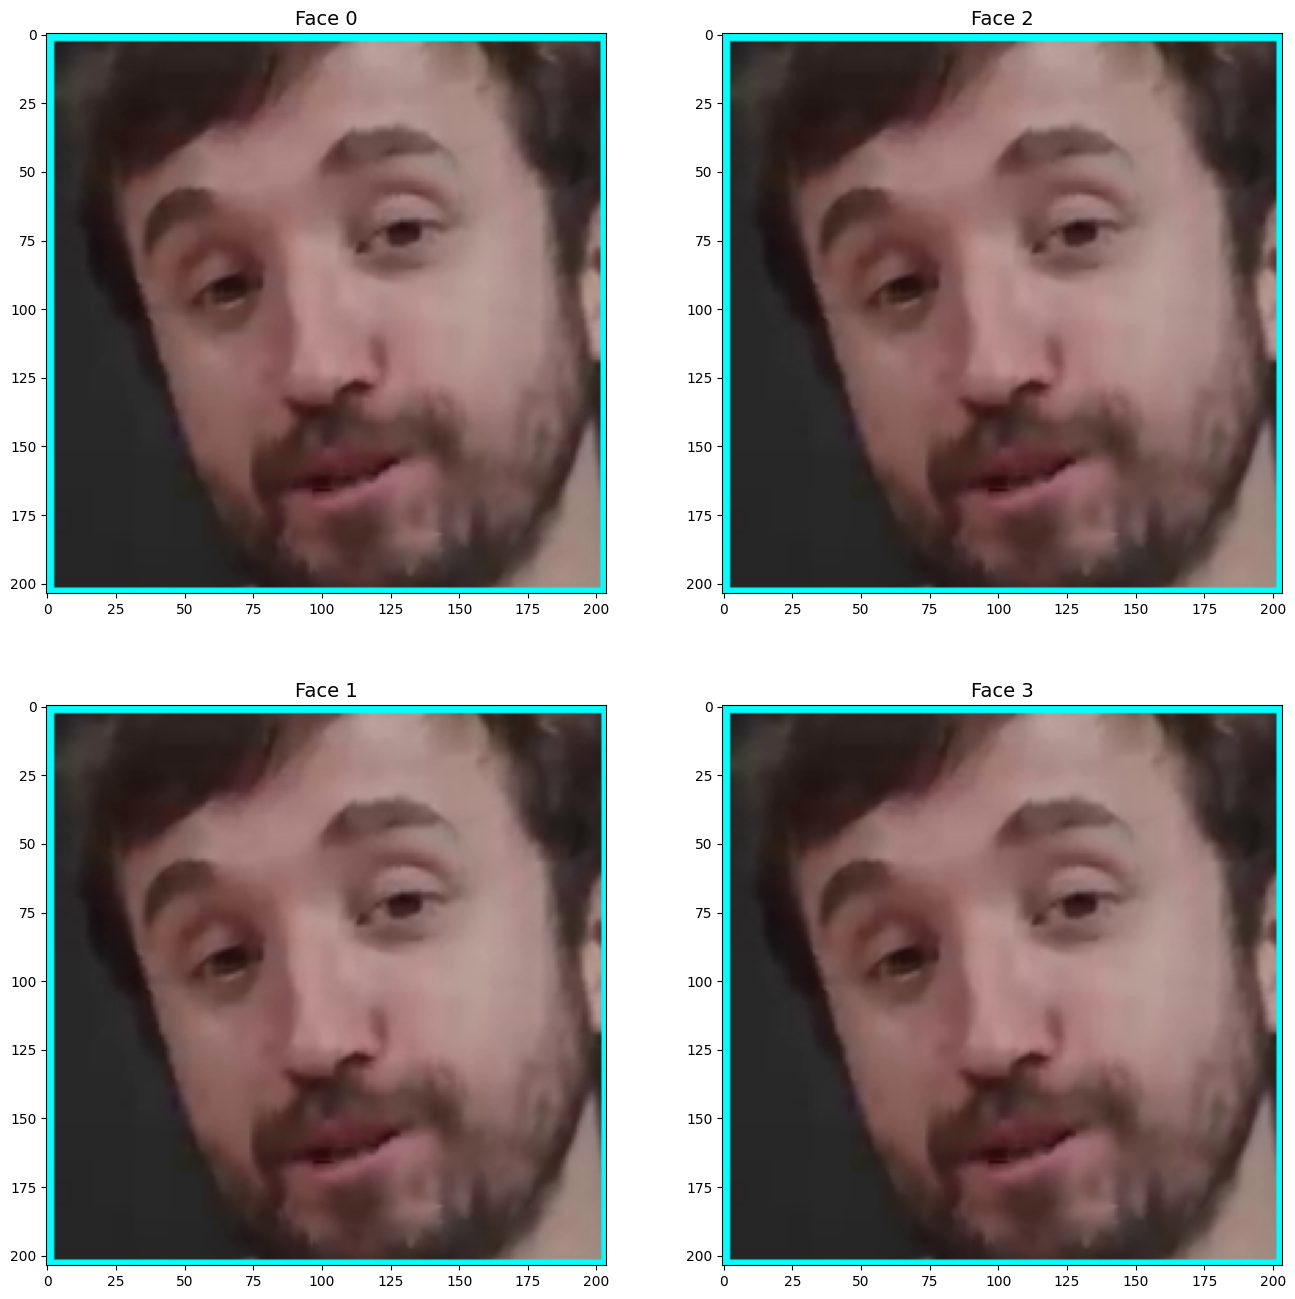

In [19]:
import matplotlib.pyplot as plt

# len Retona o numero de objetos num vetor 
num_faces = len(Leon_faces)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 16))
i = 0
for y in range(0, 2):
    for x in range(0, 2):
        axes[x, y].set_title('Face ' + str(i), fontsize = 14)
        Leon_faces[i] = cv2.cvtColor(Leon_faces[i], cv2.COLOR_BGR2RGB)
        axes[x, y].imshow(Leon_faces[i])
        i += 1

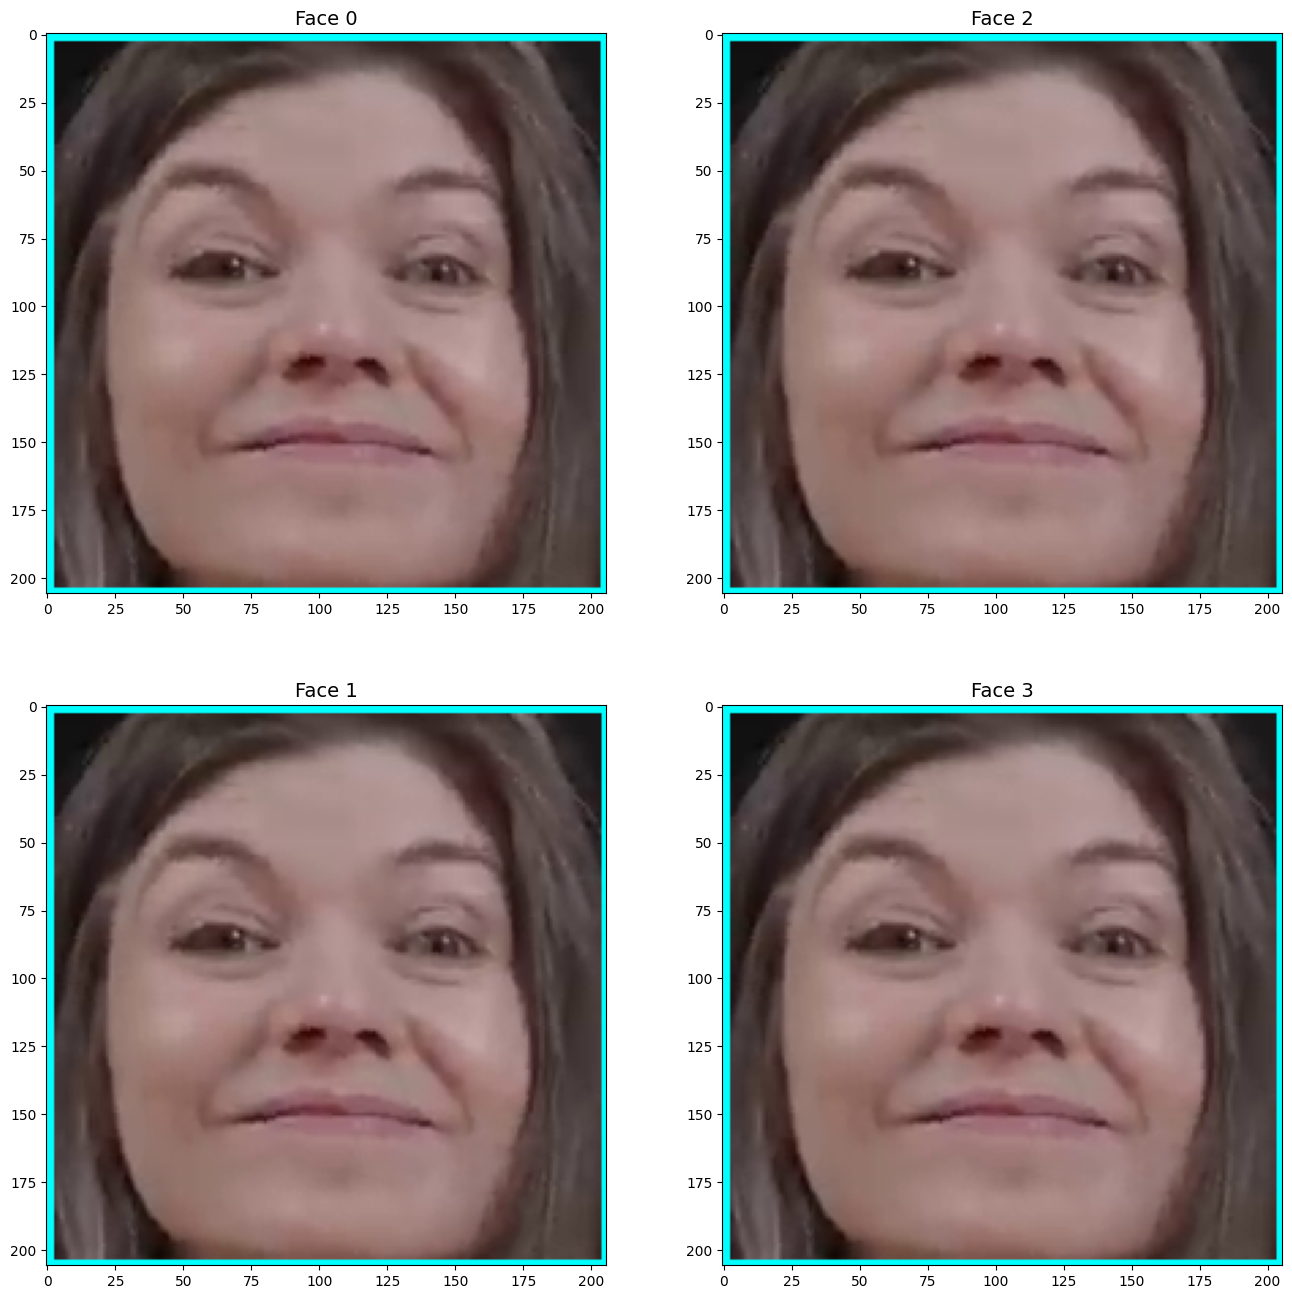

In [17]:

# len Retona o numero de objetos num vetor 
num_faces = len(Nilce_faces)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 16))
i = 0
for y in range(0, 2):
    for x in range(0, 2):
        axes[x, y].set_title('Face ' + str(i), fontsize = 14)
        Nilce_faces[i] = cv2.cvtColor(Nilce_faces[i], cv2.COLOR_BGR2RGB)
        axes[x, y].imshow(Nilce_faces[i])
        i += 1